### Lecture Week 4

## This came from MathPix...

$$
f\left(x | \mu, \sigma^{2}\right)=\frac{1}{\sqrt{2 \pi \sigma^{2}}} e^{-\frac{(x, \mu)^{2}}{2 \sigma^{2}}}
$$

In [8]:
using Plots

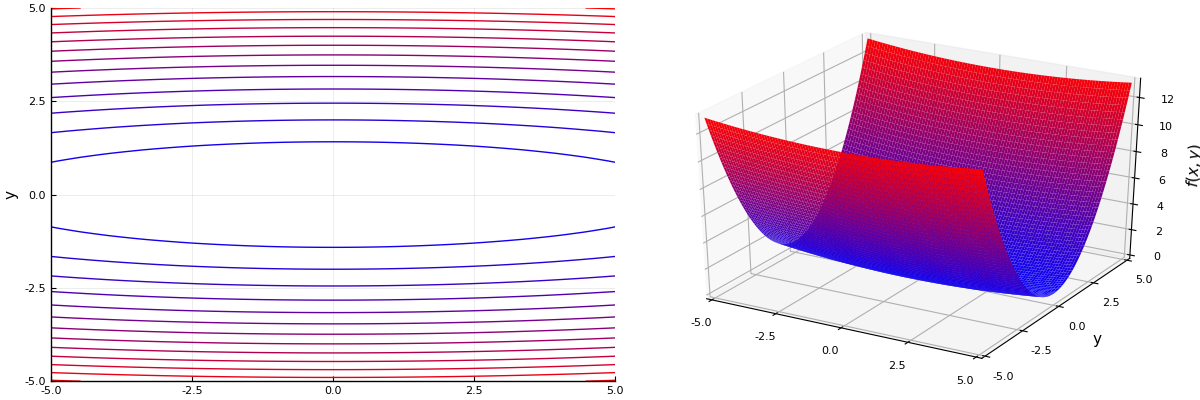

In [114]:
using Plots, LaTeXStrings

pyplot()

b = 0.05;
S = 0.5*[1 0;
         0 b];
f(x,y) = [x,y]'*S*[x,y]

grid = -5:0.1:5

z = [ f(x,y) for x in grid, y in grid ]
p1 = contour(grid, grid, z, 
        c=cgrad([:blue, :red]),legend=:none, 
        ylabel="y", zlabel=L"f(x,y)")

p2 = surface(grid, grid, z, 
        c=cgrad([:blue, :red]),legend=:none, 
        ylabel="y", zlabel=L"f(x,y)")

plot(p1,p2,size=(1200,400))

In [115]:
A = [ 2 3 -1; 2 4 -2; 3 7 -4];
det(A)

0.0

In [116]:
A = [ 2 3 -1; 2 4 -2; 3 8 -4];
det(A)

2.0

In [118]:
A = [ 1 0 -1; 0 -1 1 ; 0 1 1];
b = zeros(3)

3-element Array{Float64,1}:
 0.0
 0.0
 0.0

In [119]:
A \ b

3-element Array{Float64,1}:
  0.0
 -0.0
  0.0

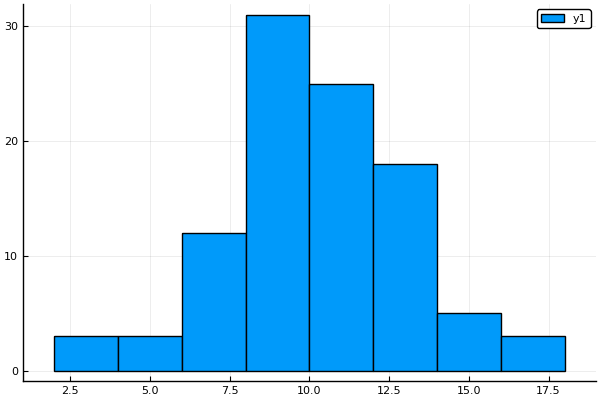

In [144]:
using Distributions, Random
Random.seed!(934)
μ,σ = 10,3
histogram(μ.+σ*rand(Normal(),100))
#histogram(rand(Normal(μ,σ),100000))

In [148]:
data = [randn(100) for _ in 1:1000];
data[353]

100-element Array{Float64,1}:
  0.9471154368749808 
 -0.6537595634542175 
 -1.1934343825530607 
  1.0077186535486828 
 -0.9128194754159378 
 -0.1429145496721263 
  0.14906887308703115
 -0.8688752694856664 
 -0.12563163345013323
  2.76484986021074   
  0.8005819166642824 
 -0.9441851058287661 
 -0.2582324967178138 
  ⋮                  
 -0.39741216636520327
  0.09727174976207856
  0.5849385816886403 
  0.5881524252981882 
  0.8182815992198952 
  0.28282924139220195
  0.22635066997912787
  1.8199891284517031 
 -0.22802500153800748
 -0.26805639550730564
 -0.8929989405513722 
 -0.13220857706920322

In [133]:
randn()

-0.6409174257127921

In [151]:
A = [1.2 -0.3;
-2.6 -3.7];

A \ zeros(2)


2-element Array{Float64,1}:
 -0.0
 -0.0

In [152]:
det(A)

-5.219999999999999

In [153]:
inv(A)

2×2 Array{Float64,2}:
  0.708812  -0.0574713
 -0.498084  -0.229885 

In [156]:
inv(A)*zeros(2)

2-element Array{Float64,1}:
 0.0
 0.0

In [157]:
A \ [1,1]

2-element Array{Float64,1}:
  0.6513409961685825
 -0.727969348659004 

In [158]:
A = [ 2 4;
      3 6];

In [160]:
A \ zeros(2)

SingularException: SingularException(2)

In [162]:
a1= [0,0,-1];a2=[1/sqrt(2),1/sqrt(2),0];a3=[1/sqrt(2),-1/sqrt(2),0];
-1*a1+sqrt(2)*a2+0*a3

3-element Array{Float64,1}:
 1.0
 1.0
 1.0

In [161]:
? \

search: \



```
\(x, y)
```

Left division operator: multiplication of `y` by the inverse of `x` on the left. Gives floating-point results for integer arguments.

# Examples

```jldoctest
julia> 3 \ 6
2.0

julia> inv(3) * 6
2.0

julia> A = [4 3; 2 1]; x = [5, 6];

julia> A \ x
2-element Array{Float64,1}:
  6.5
 -7.0

julia> inv(A) * x
2-element Array{Float64,1}:
  6.5
 -7.0
```

---

```
\(A, B)
```

Matrix division using a polyalgorithm. For input matrices `A` and `B`, the result `X` is such that `A*X == B` when `A` is square. The solver that is used depends upon the structure of `A`.  If `A` is upper or lower triangular (or diagonal), no factorization of `A` is required and the system is solved with either forward or backward substitution. For non-triangular square matrices, an LU factorization is used.

For rectangular `A` the result is the minimum-norm least squares solution computed by a pivoted QR factorization of `A` and a rank estimate of `A` based on the R factor.

When `A` is sparse, a similar polyalgorithm is used. For indefinite matrices, the `LDLt` factorization does not use pivoting during the numerical factorization and therefore the procedure can fail even for invertible matrices.

# Examples

```jldoctest
julia> A = [1 0; 1 -2]; B = [32; -4];

julia> X = A \ B
2-element Array{Float64,1}:
 32.0
 18.0

julia> A * X == B
true
```

---

```
(\)(F::QRSparse, B::StridedVecOrMat)
```

Solve the least squares problem $\min\|Ax - b\|^2$ or the linear system of equations $Ax=b$ when `F` is the sparse QR factorization of $A$. A basic solution is returned when the problem is underdetermined.

# Examples

```jldoctest
julia> A = sparse([1,2,4], [1,1,1], [1.0,1.0,1.0], 4, 2)
4×2 SparseMatrixCSC{Float64,Int64} with 3 stored entries:
  [1, 1]  =  1.0
  [2, 1]  =  1.0
  [4, 1]  =  1.0

julia> qr(A)\fill(1.0, 4)
2-element Array{Float64,1}:
 1.0
 0.0
```


---

In [1]:
using LinearAlgebra

## Add this package: [RowEchelon](https://github.com/blegat/RowEchelon.jl)

In [3]:
using Pkg
Pkg.add("RowEchelon")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed RowEchelon ─── v0.1.1
 Installed DoubleFloats ─ v0.9.5
  Updating `~/.julia/environments/v1.1/Project.toml`
  [af85af4c] + RowEchelon v0.1.1
  Updating `~/.julia/environments/v1.1/Manifest.toml`
  [497a8b3b] ↑ DoubleFloats v0.9.4 ⇒ v0.9.5
  [af85af4c] + RowEchelon v0.1.1


In [38]:
using RowEchelon
A = [1 3 8;
     1 2 6;
     0 1 2]
RR = rref(A)

3×3 Array{Float64,2}:
 1.0  0.0  2.0
 0.0  1.0  2.0
 0.0  0.0  0.0

In [39]:
C = [A[:,1] A[:,2]]

3×2 Array{Int64,2}:
 1  3
 1  2
 0  1

In [46]:
R = RR[1:2,:]

2×3 Array{Float64,2}:
 1.0  0.0  2.0
 0.0  1.0  2.0

In [47]:
C*R

3×3 Array{Float64,2}:
 1.0  3.0  8.0
 1.0  2.0  6.0
 0.0  1.0  2.0

In [48]:
rank(A)

2

In [6]:
A = [1 2 5; 
    1 2 5;
    1 2 5];
rref(A)

3×3 Array{Float64,2}:
 1.0  2.0  5.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [92]:
using Random, Plots
pyplot()
Random.seed!(1)

A = [rand() > 0.9 ? rand([1,2,3]) : 0 for i in 1:10, j in 1:10]

10×10 Array{Int64,2}:
 0  0  0  2  0  0  0  0  0  0
 0  0  0  0  0  0  0  3  0  0
 0  0  0  0  0  0  1  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  1
 3  0  0  0  0  0  3  0  0  0
 1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0
 0  0  0  0  3  0  0  0  0  0

In [93]:
rank(A)

6

In [94]:
RR = rref(A)

10×10 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [95]:
cc = [1,4,5,7,8,10]

6-element Array{Int64,1}:
  1
  4
  5
  7
  8
 10

In [96]:
C = A[:,cc]

10×6 Array{Int64,2}:
 0  2  0  0  0  0
 0  0  0  0  3  0
 0  0  0  1  0  0
 0  0  0  0  0  0
 0  0  0  0  0  0
 0  0  0  0  1  1
 3  0  0  3  0  0
 1  0  0  0  0  0
 0  0  0  0  0  0
 0  0  3  0  0  0

In [97]:
C*RR[1:6,:]

10×10 Array{Float64,2}:
 0.0  0.0  0.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0
 3.0  0.0  0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  3.0  0.0  0.0  0.0  0.0  0.0

In [102]:
A = rand([1,2,3],3,2);
B = rand([1,2,3],2,4)
A*B

3×4 Array{Int64,2}:
 6  18  18  12
 3   9   9   5
 6  18  18  12

In [113]:
a1 = [1.2, -2.6];
a2 = [-0.3, -3.7];
A = hcat(a1,a2);
A\[1,1]

2-element Array{Float64,1}:
  0.6513409961685825
 -0.727969348659004 